# POSEIDON 3D

## MODULOS Y LIBRERÍAS

In [1]:
from __future__ import print_function
from os.path import isfile, join
import segyio
from os import listdir
import numpy as np
np.set_printoptions(threshold=np.nan) #Print todo el numpy.array
import scipy.misc


## LECTURA DE DATOS

## Datos de Pozos
### A través de text files: formato en la carpeta anexa [Archivo Pozos_Info]
#### Estructura del txt y del diccionario anidado: UtmX, UtmY, Datum de Elevación, Profundidad Máxima (Depth), Velocidad de Reemplazo, ubicación en coordenadas Inline/Crossline

In [2]:
with open('Pozos_Info.txt','r') as pozo:
    Listas_Pozo = []
    Pozos_Info = {}
    nlineas=0
    print('Pozos cargados y guardados dentro de "Pozos_Info": ',)
    for line in pozo:
        Listas_Pozo.append(line.split())
        nlineas = nlineas + 1
    for i in range(0,nlineas,2):
        Pozos_Info[Listas_Pozo[i][0]] = {'Utm_X':float(Listas_Pozo[i+1][0]),'Utm_Y':float(Listas_Pozo[i+1][1]),'D_Elev[m]':float(Listas_Pozo[i+1][2]),'Depth[m]':float(Listas_Pozo[i+1][3]),'V_Rep[m/s]':float(Listas_Pozo[i+1][4]),'Inline/Crossline':Listas_Pozo[i+1][5]}
        print('  ',Listas_Pozo[i][0])
    #print(Pozos_Info.keys())
    #print(Pozos_Info.values())

Pozos cargados y guardados dentro de "Pozos_Info": 
   Boreas_1
   Kronos_1
   Pharos_1
   Poseidon_1
   Poseidon_2
   Poseidon_North_1
   Proteus_1ST2
   Torosa_1


## Datos de Cubos Sísmicos 
### 1era Inspección y ordenamiento por CMP en diccionario de los archivos [SEG-Y]: 
###                                                (NS, MS y FS)2650-3050_2660-3060
#### Estructura del diccionario: Posición de la traza y coordenadas UTMX-UTMY ordenadas por CDP

In [3]:
#PRIMERA INSPECCIÓN DE DATOS

def lecturaSEG(NombreDato):
    print('Información general del CUBO SÍSMICO: ',NombreDato)
    with segyio.open(NombreDato,'r') as segy:
        print('    Crosslines........................: ',segy.xlines[0], '-',segy.xlines[-1])
        print('    Inlines...........................: ',segy.ilines[0], '-',segy.ilines[-1])
        print('    Cantidad de trazas por cubo.......: ',segy.tracecount)
        print('    Cantidad de trazas por línea......: ',len(segy.iline[2650]))
        print('    Headers por traza.................: ',len(segy.header[0].items()))  
        print('    Intérvalo de muestreo.............: ',segy.attributes(segyio.TraceField.TRACE_SAMPLE_INTERVAL)[0], 'ms')
        print('    Timeslices........................: ',len(segy.trace[0]))
        
lecturaSEG('NS2650-3050_2660-3060.sgy')



#ORDENAMIENTO POR CMP EN DICCIONARIO:

with segyio.open('NS2650-3050_2660-3060.sgy','r') as segy:
    Sort_CDP = {}
    poss_trace = []
    utmx_trace = []
    utmy_trace = []
    cont = 0
    #Sort por CDP en diccionario [poss_trace]
    for mincdp in range(segy.xlines[0],segy.xlines[-1]+1,1):
        for trace in range(0,segy.tracecount,1):
            if segy.attributes(segyio.TraceField.CDP)[trace] == mincdp:
                poss_trace.append(trace)
                utmx_trace.append(segy.attributes(segyio.TraceField.CDP_X)[trace])
                utmy_trace.append(segy.attributes(segyio.TraceField.CDP_Y)[trace])
        #print(list_to_poss)
        Sort_CDP[mincdp] = {'Pos_trace':poss_trace,'Utm_X':utmx_trace,'Utm_Y':utmy_trace}
        poss_trace = []
        utmx_trace = []
        utmy_trace = []
        cont = cont + 1

Información general del CUBO SÍSMICO:  NS2650-3050_2660-3060.sgy
    Crosslines........................:  3050 - 3060
    Inlines...........................:  2650 - 2660
    Cantidad de trazas por cubo.......:  121
    Cantidad de trazas por línea......:  11
    Headers por traza.................:  89
    Intérvalo de muestreo.............:  [4000] ms
    Timeslices........................:  1501


### Ordenamiento por CMP en diccionario:
#### Estructura del diccionario: Posición de la traza y coordenadas UTM ordenadas por CDP

In [4]:
with segyio.open('NS2650-3050_2660-3060.sgy','r') as segy:
    Sort_CDP = {}
    poss_trace = []
    utmx_trace = []
    utmy_trace = []
    cont = 0
    #Sort por CDP en diccionario [poss_trace]
    for mincdp in range(segy.xlines[0],segy.xlines[-1]+1,1):
        for trace in range(0,segy.tracecount,1):
            if segy.attributes(segyio.TraceField.CDP)[trace] == mincdp:
                poss_trace.append(trace)
                utmx_trace.append(segy.attributes(segyio.TraceField.CDP_X)[trace])
                utmy_trace.append(segy.attributes(segyio.TraceField.CDP_Y)[trace])
        #print(list_to_poss)
        Sort_CDP[mincdp] = {'Pos_trace':poss_trace,'Utm_X':utmx_trace,'Utm_Y':utmy_trace}
        poss_trace = []
        utmx_trace = []
        utmy_trace = []
        cont = cont + 1


In [5]:
Sort_CDP[3050]

{'Pos_trace': [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110],
 'Utm_X': [array([4118445], dtype=int32),
  array([4118566], dtype=int32),
  array([4118686], dtype=int32),
  array([4118807], dtype=int32),
  array([4118927], dtype=int32),
  array([4119048], dtype=int32),
  array([4119168], dtype=int32),
  array([4119289], dtype=int32),
  array([4119409], dtype=int32),
  array([4119530], dtype=int32),
  array([4119651], dtype=int32)],
 'Utm_Y': [array([84919954], dtype=int32),
  array([84920098], dtype=int32),
  array([84920241], dtype=int32),
  array([84920385], dtype=int32),
  array([84920529], dtype=int32),
  array([84920672], dtype=int32),
  array([84920816], dtype=int32),
  array([84920960], dtype=int32),
  array([84921103], dtype=int32),
  array([84921247], dtype=int32),
  array([84921390], dtype=int32)]}

## GENERACIÓN DEL BASE MAP: [LINEAS SÍSMICAS + POZOS]
### Uso de Bokeh

In [ ]:
# output to static HTML file
#output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="Basemap 2D", x_axis_label='UTM X (m)', y_axis_label='UTM Y (m)')
for 
# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

10201


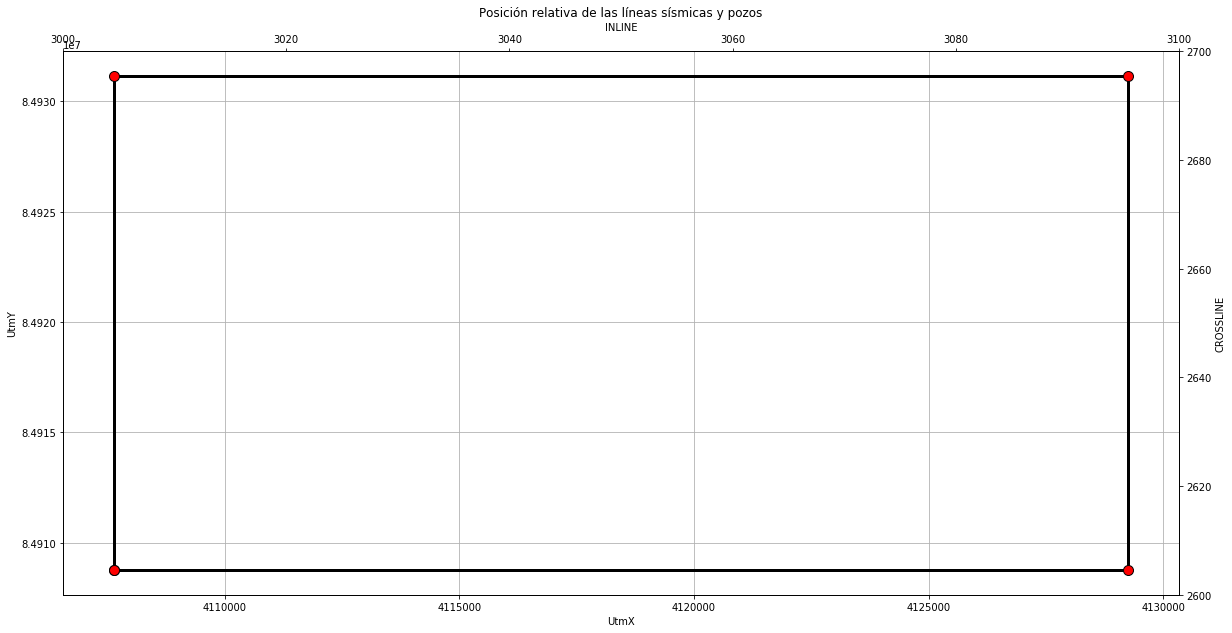

In [97]:
import matplotlib.pyplot as plt
with segyio.open('NS2600-3000_2700-3100.sgy','r') as segy:
    #for line in segy.fast[::2]:
        #print(np.average(line))
    #print(segy.gather[2600,3000].shape) #INTERSECCION ILINE 2600 XLINE 3000
    #print(segy.iline[2600].shape)
    #print(segy.attributes(segyio.TraceField.offset)[1000])
    #.attributes(segyio.TraceField.CDP)[ntraza])
    #print(segy.attributes(segyio.TraceField.CDP_Y)[1])
    #print(segy.iline[2600])
    utmx = segy.attributes(segyio.TraceField.CDP_X)[:]
    utmy = segy.attributes(segyio.TraceField.CDP_Y)[:]
    twoD = plt.figure(figsize=(20,10))
    ax1 = twoD.add_subplot(111)
    ax1.set(title='Posición relativa de las líneas sísmicas y pozos',xlabel='UtmX',ylabel='UtmY')
    ax1.plot([np.min(utmx),np.min(utmx),np.max(utmx),np.max(utmx),np.min(utmx)], [np.min(utmy),np.max(utmy),np.max(utmy),np.min(utmy),np.min(utmy)],marker='o',mfc='red',ms=10, color='black',linewidth=3)
    ax1.grid()
    #ax.scatter([],[], color='darkgreen', marker='^') pozos
    ax2 = ax1.twinx()
    ax2.set_ylim(2600,2700)
    ax2.set(ylabel='CROSSLINE')
    ax3 = ax1.twiny()
    ax3.set_xlim(3000,3100)
    ax3.set(xlabel='INLINE')
    plt.show
#========================================================

    
    
    
    
    print(len(utmx))

/home/lsd/anaconda3/envs/TEG/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


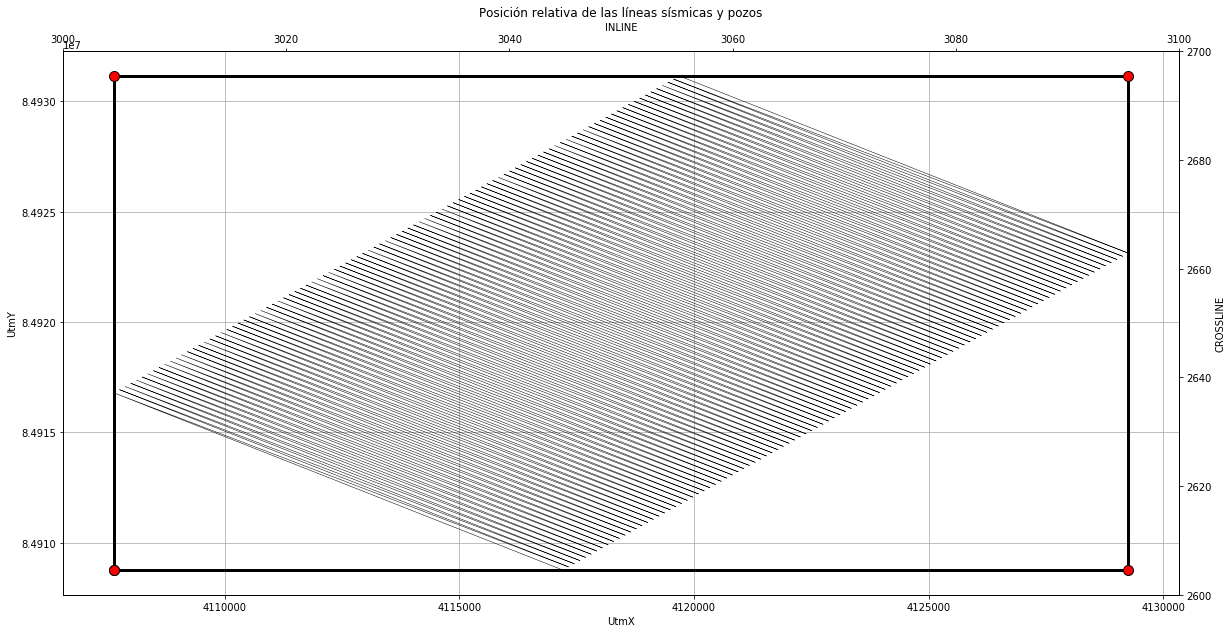

In [107]:
import matplotlib.pyplot as plt
with segyio.open('NS2600-3000_2700-3100.sgy','r') as segy:
    #for line in segy.fast[::2]:
        #print(np.average(line))
    #print(segy.gather[2600,3000].shape) #INTERSECCION ILINE 2600 XLINE 3000
    #print(segy.iline[2600].shape)
    #print(segy.attributes(segyio.TraceField.offset)[1000])
    #.attributes(segyio.TraceField.CDP)[ntraza])
    #print(segy.attributes(segyio.TraceField.CDP_Y)[1])
    #print(segy.iline[2600])
    utmx = segy.attributes(segyio.TraceField.CDP_X)[:]
    utmy = segy.attributes(segyio.TraceField.CDP_Y)[:]
    twoD = plt.figure(figsize=(20,10))
    ax1 = twoD.add_subplot(111)
    ax1.set(title='Posición relativa de las líneas sísmicas y pozos',xlabel='UtmX',ylabel='UtmY')
    ax1.plot([np.min(utmx),np.min(utmx),np.max(utmx),np.max(utmx),np.min(utmx)], [np.min(utmy),np.max(utmy),np.max(utmy),np.min(utmy),np.min(utmy)],marker='o',mfc='red',ms=10, color='black',linewidth=3)
    ax1.grid()
    #ax.scatter([],[], color='darkgreen', marker='^') pozos
    ax2 = ax1.twinx()
    ax2.set_ylim(2600,2700)
    ax2.set(ylabel='CROSSLINE')
    ax3 = ax1.twiny()
    ax3.set_xlim(3000,3100)
    ax3.set(xlabel='INLINE')
    ax4 = twoD.add_subplot(111)
    ax4.plot(utmx,utmy,color='black',linewidth=0.5)        
    plt.show
#========================================================

In [100]:
utmx[0]

4117207

<function matplotlib.pyplot.show(*args, **kw)>

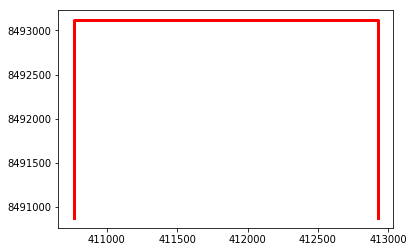

In [29]:
import matplotlib.pyplot as plt
twoD = plt.figure()
ax = twoD.add_subplot(111)
ax.plot([410763.1,410763.1,412925.9,412925.9],[8490875.5,8493115.3,8493115.3,8490875.5],color='red',linewidth=3)
plt.show

In [109]:
with segyio.open('NS2600-3000_2700-3100.sgy','r') as segy:
    print(segy.iline[2600:2601])

<generator object Line.__getitem__.<locals>.gen at 0xa775e5cc>


# ORDENAMIENTO POR CMD DEL DATO EN DICCIONARIOS PARA PLOT

In [34]:
with segyio.open('NS2600-3000_2700-3100.sgy','r') as segy:
    #trace_array = np.zeros((ns.tracecount*3,len(fs.trace[10200])))
    #coord_array = np.zeros((ns.tracecount*3,len(fs.trace[10200])))
    dict_grafica = {}
    poss_trace = []
    utmx_trace = []
    utmy_trace = []
    #Sort por CDP en diccionario [poss_trace]
    for mincdp in range(segy.xlines[0],segy.xlines[-1]+1,1):
        for trace in range(0,segy.tracecount,1):
            if segy.attributes(segyio.TraceField.CDP)[trace] == mincdp:
                poss_trace.append(trace)
                utmx_trace.append(segy.attributes(segyio.TraceField.CDP_X)[trace])
                utmy_trace.append(segy.attributes(segyio.TraceField.CDP_Y)[trace])
        #print(list_to_poss)
        dict_grafica[mincdp] = poss_trace
        dict_grafica[mincdp+segy.xlines[0]] = utmx_trace
        dict_grafica[mincdp+segy.xlines[0]+segy.xlines[0]] = utmy_trace
        poss_trace = []
        utmx_trace = []
        utmy_trace = []
                #cont = cont + 1
                #print('CDP: ',mincdp,'en trace[',trace,']')
            #poss[mincpd] = list_to_poss[cont]
            #cont = cont + 1 

In [35]:
print(dict_gra

dict_keys([3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 9098, 6083, 6084, 6085, 9072, 9099, 6086, 9073, 9100, 6087, 9074, 6088, 9075, 9097, 6089, 9076, 6090, 9077, 6091, 9078, 6092, 9079, 6093, 9080, 6094, 9081, 6095, 9082, 6096, 9083, 6097, 9084, 6098, 9085, 6099, 9095, 9086, 6100, 9087, 9088, 9089, 9090, 9096, 9091, 9092, 9093, 9094, 9000, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012, 9013, 9014, 9015, 9016, 9017, 9018, 9019, 9020, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062, 9063, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 6000, 6001, 6002, 6003, 6004, 6005,

In [22]:
    #Sort por CDP en diccionario [poss_trace]
    for mincdp in range(segy.xlines[0],segy.xlines[-1]+1,1):
        for trace in range(0,segy.tracecount,1):
            if segy.attributes(segyio.TraceField.CDP)[trace] == mincdp:
                poss_trace.append(trace)
        dict_grafica[mincdp] = poss_trace
        poss_trace = []
    #Coordenadas UTMX en diccionario [utmx_trace]
    for mincdp in range(segy.xlines[0],segy.xlines[-1]+1,1):
        for trace in range(0,segy.tracecount,1):
            if segy.attributes(segyio.TraceField.CDP)[trace] == mincdp:
                utmx_trace.append(segy.attributes(segyio.TraceField.CDP_X)[trace])
        dict_grafica['utmx_sort_CDP'] = utmx_trace
        utmx_trace = []
    #Coordenadas UTMY en diccionario [utmy_trace]
    for mincdp in range(segy.xlines[0],segy.xlines[-1]+1,1):
        for trace in range(0,segy.tracecount,1):
            if segy.attributes(segyio.TraceField.CDP)[trace] == mincdp:
                utmy_trace.append(segy.attributes(segyio.TraceField.CDP_Y)[trace])
        dict_grafica['utmy_sort_CDP'] = utmy_trace
        utmy_trace = []

[array([4107631], dtype=int32),
 array([4107752], dtype=int32),
 array([4107872], dtype=int32),
 array([4107993], dtype=int32),
 array([4108113], dtype=int32),
 array([4108234], dtype=int32),
 array([4108354], dtype=int32),
 array([4108475], dtype=int32),
 array([4108595], dtype=int32),
 array([4108716], dtype=int32),
 array([4108836], dtype=int32),
 array([4108957], dtype=int32),
 array([4109077], dtype=int32),
 array([4109198], dtype=int32),
 array([4109319], dtype=int32),
 array([4109439], dtype=int32),
 array([4109560], dtype=int32),
 array([4109680], dtype=int32),
 array([4109801], dtype=int32),
 array([4109921], dtype=int32),
 array([4110042], dtype=int32),
 array([4110162], dtype=int32),
 array([4110283], dtype=int32),
 array([4110403], dtype=int32),
 array([4110524], dtype=int32),
 array([4110644], dtype=int32),
 array([4110765], dtype=int32),
 array([4110885], dtype=int32),
 array([4111006], dtype=int32),
 array([4111126], dtype=int32),
 array([4111247], dtype=int32),
 array([

In [37]:
print(len(poss[3100]))

101


In [244]:
b.append(1)

In [245]:
b

[1]

In [246]:
c[1] = b

In [247]:
c

{1: [1]}

In [18]:
with segyio.open('NS2600-3000_2700-3100.sgy','r') as segy:
    #trace_array = np.zeros((ns.tracecount*3,len(fs.trace[10200])))
    #coord_array = np.zeros((ns.tracecount*3,len(fs.trace[10200])))
    dict_grafica = {}
    poss_trace = []
    utmx_trace = []
    utmy_trace = []
    print(segy.attributes(segyio.TraceField.GroupX)[1])

[0]


In [15]:
utmx_trace

[array([0], dtype=int32)]

In [209]:
A[0][2] = 69

In [219]:
len(list_to_poss[0])

101

In [220]:
A=[]

In [221]:
A=[2]

In [222]:
A

[2]

In [223]:
A=[6]

In [224]:
A


[6]

In [225]:
A.append(6)

In [226]:
A.append(4)

In [227]:
A

[6, 6, 4]

In [255]:
A = []

In [256]:
A

[]

In [38]:
utmy_max_array = np.zeros(101)

In [39]:
print(utmy_max_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [41]:
import matplotlib.pyplot as plt
with segyio.open('NS2600-3000_2700-3100.sgy','r') as segy:
    #for line in segy.fast[::2]:
        #print(np.average(line))
    #print(segy.gather[2600,3000].shape) #INTERSECCION ILINE 2600 XLINE 3000
    #print(segy.iline[2600].shape)
    #print(segy.attributes(segyio.TraceField.offset)[1000])
    #.attributes(segyio.TraceField.CDP)[ntraza])
    #print(segy.attributes(segyio.TraceField.CDP_Y)[1])
    #print(segy.iline[2600])
    utmx = np.min(segy.attributes(segyio.TraceField.CDP_X)[:])
    print(utmx)

4107631
